In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
# Utilize um haarcasdade pré treinado para o reconhecimento facial
# Utilize um modelo pré treinado para o reconhecimento das emoções
cascade_faces = "haarcascade_frontalface_default.xml"
caminho_modelo = "modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"] # Expressões identicadas pelo modelo

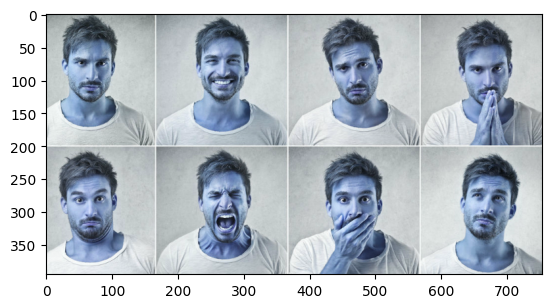

In [3]:
# Selecione uma imagem da pasta "testes" para o reconhecimento da emoção
imagem = cv2.imread('testes/teste02.jpg')
plt.imshow(imagem)
plt.show()

In [4]:
faces = face_detection.detectMultiScale(imagem, scaleFactor = 1.05, minNeighbors = 5, minSize = (40,40))
faces

array([[627,  50,  89,  89],
       [229, 242,  85,  85],
       [420, 243,  97,  97],
       [225,  36,  88,  88],
       [625, 239,  93,  93],
       [ 18, 243,  98,  98],
       [ 22,  40,  93,  93],
       [419,  42,  99,  99]])

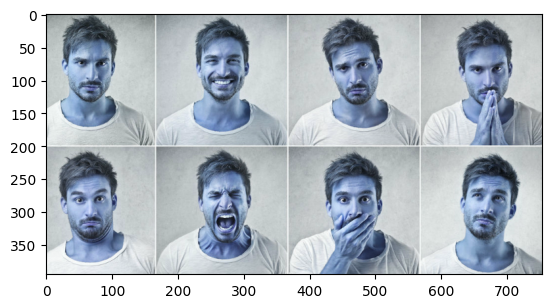

In [5]:
# Convertendo a imagem em escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
#cv2.imshow("cinza",cinza)
plt.imshow(imagem)
plt.show()

1/1 [==============================] - 0s 194ms/step
[0.13112023 0.00428336 0.25282845 0.01055991 0.2897767  0.02368287
 0.2877485 ]
0.2897767
4
1/1 [==============================] - 0s 17ms/step
[0.37346736 0.03865108 0.35262498 0.02497405 0.1372066  0.02688459
 0.04619129]
0.37346736
0
1/1 [==============================] - 0s 19ms/step
[5.4702815e-03 2.1148653e-05 2.1889290e-01 2.4303650e-03 1.8594706e-03
 7.6433247e-01 6.9933571e-03]
0.7643325
5
1/1 [==============================] - 0s 17ms/step
[2.4017319e-09 5.8310756e-21 7.3453443e-10 9.9966705e-01 2.4418558e-08
 6.6168373e-09 3.3287733e-04]
0.99966705
3
1/1 [==============================] - 0s 19ms/step
[7.7402331e-02 6.4981970e-05 7.1874067e-02 1.4289453e-02 2.0258914e-01
 3.1166673e-03 6.3066339e-01]
0.6306634
6
1/1 [==============================] - 0s 19ms/step
[7.6810710e-02 8.0521902e-05 6.1794352e-02 1.3917208e-02 1.1936786e-01
 8.9475112e-03 7.1908176e-01]
0.71908176
6
1/1 [==============================] - 0s 19ms/s

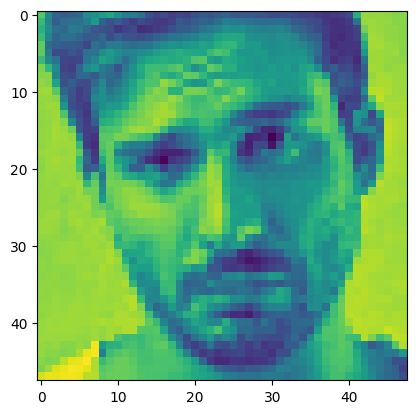

In [6]:
original = imagem.copy()

for (x, y, w, h) in faces:
  # Extração do ROI (região de interesse)
  roi = cinza[y:y + h, x:x + w] # utiliza-se as coordenadas (onde inicia a face) e a largura e altura para extrair a região de interesse

  # Redimensiona imagem
  roi = cv2.resize(roi, (48, 48))

  plt.imshow(roi)

  # Normalização
  roi = roi.astype("float") / 255
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis = 0)

  # Previsões
  preds = classificador_emocoes.predict(roi)[0]
  print(preds)

  # Emoção detectada
  emotion_probability = np.max(preds)
  print(emotion_probability)

  print(preds.argmax())
  label = expressoes[preds.argmax()]


  # Mostra resultado na tela para o rosto
  cv2.putText(original, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)

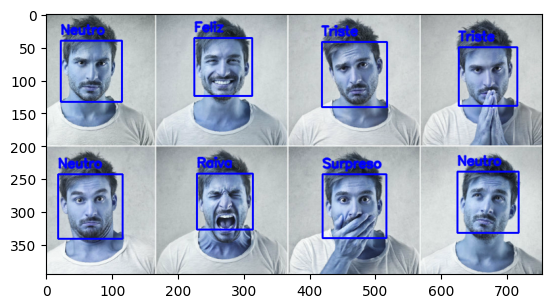

In [7]:
plt.imshow(original)